In [1]:
!pip install --upgrade diffusers transformers -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.3 MB/s eta 0:00:00


In [2]:
from diffusers import StableDiffusionPipeline
from transformers import pipeline
import torch
import cv2

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [3]:
model = StableDiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2",
    torch_dtype=torch.float16,
    revision="fp16",
    use_auth_token='your_hugging_face_auth_token',
    guidance_scale=9)

text_encoder/model.safetensors not found


Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

Keyword arguments {'guidance_scale': 9} are not expected by StableDiffusionPipeline and will be ignored.
Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


In [4]:
model = model.to("cuda")

In [5]:
def generate(prompt, model):
    image = model(
        prompt, num_inference_steps=30,
        generator=torch.Generator(),
        guidance_scale=9
    ).images[0]

    image = image.resize((250,250))
    return image

  0%|          | 0/30 [00:00<?, ?it/s]

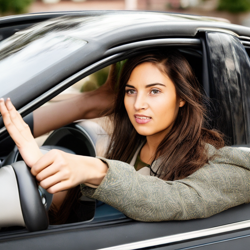

In [7]:
generate("women driving car", model)

  0%|          | 0/30 [00:00<?, ?it/s]

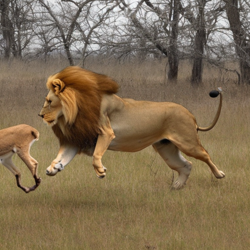

In [10]:
generate("lion chasing deer", model)

  0%|          | 0/30 [00:00<?, ?it/s]

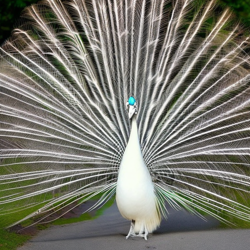

In [15]:
generate("dancing white peacock", model)